In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy import stats
import pandas as pd

In [2]:
FIG_DIM = 5
DPI = 300
AX_FONT = 14
TICK_FONT = 12

In [3]:
def getKernelDensityAll(data, species_info, measure,selection_data = None, selection_key = None,weights_key=None, min_val = 0, 
                     max_val = 1,n_steps=1000):
    lines = {}
    for key in species_info['Sample ID']:
        print(key)
        values = data[key][measure]
        if selection_key:
            selection_ids = selection_data[key][selection_key]
        else: 
            selection_ids = np.arange(len(values))
        
        values = values[selection_ids]
        if weights_key:
            weight = data[key][weights_key]
            weight = weight[selection_ids]
        else: 
            weight = None
        
        kde = getKernelDensityEstimator(values, weight)
        test_vals = np.linspace(min_val, max_val, n_steps)
        pdf = kde(test_vals)
        lines[key] = pdf
    return lines, [min_val, max_val, n_steps]

def getKernelDensityEstimator(values, weights):
    nparam_density = stats.kde.gaussian_kde(values,weights = weights)
    return nparam_density
    
def getLikelyPerSpecies(lines, species_info):
    specs = ['bifurcata', 'cytherea', 'hyacinthus']
    species_relevant = [species_info[species_info['Morphospecies'] == spec]['Sample ID'].values for spec in specs]
    results  = {}
    for x in range(3):
        IDS = species_relevant[x]
        vals = np.zeros((len(IDS),len(lines[IDS[0]])))
        for i,sp in enumerate(IDS):
            vals[i] = lines[sp]
        results[specs[x]] = {
            'mean': np.mean(vals, axis = 0),
            'SD': np.std(vals, axis = 0)
        }
    return results

def plotKDE(lines, rang,species_info, xlabel,xlim=None):
    if xlim == None:
        xlim = (rang[0], rang[1])
    per_spec = getLikelyPerSpecies(lines, species_info)
    x = np.linspace(rang[0], rang[1], rang[2])
    colors = {'bifurcata':'#1f77b4', 'cytherea':'#2ca02c','hyacinthus':'#ff7f0e'}

    fig = plt.figure(figsize=(5,5))
    for key in per_spec:
        data = per_spec[key]
        plt.plot(x,data['mean'], color = colors[key], label = key)
        plt.fill_between(x, data['mean'] - data['SD'], data['mean']+ data['SD'],
                        alpha = .2, color = colors[key])
    plt.xlabel(xlabel, fontsize=AX_FONT)
    plt.ylabel('density', fontsize = AX_FONT)
    plt.legend(fontsize = AX_FONT)
    plt.tick_params(axis='both', which='major', labelsize=TICK_FONT)
    plt.grid()
    plt.xlim(xlim)
    plt.ylim(0)
    plt.tight_layout()
    return fig



In [5]:
species_info = pd.read_csv(f'{vtk.DIR_DATA}/species_info_v1.csv')
da_measures = pickle.read

,Sample ID,Collection year,Genus,Open nomenclature,Morphospecies,Dataset
0,15Oki01,2015,Acropora,aff.,bifurcata,Testing
1,15Oki02,2015,Acropora,aff.,hyacinthus,Testing
2,15Oki03,2015,Acropora,aff.,bifurcata,Testing
3,15Oki04,2015,Acropora,aff.,cytherea,Testing
4,15Oki05,2015,Acropora,aff.,cytherea,Testing


# Example

In [42]:
sphere_data = load_data.readPickle('spheres_angles_end')
spheres =['da', 'db','dc','angle'] 
max_val = [1.7, 1.2, 1.1,3]
for i,sphere in enumerate(spheres):
    lines, rang = getKernelDensityAll(sphere_data, species_info, sphere,max_val = max_val[i])
    load_data.writePickle({'lines':lines, 'range': rang}, f'KD_estimation/KDE_{sphere}')

15Oki01
15Oki02
15Oki03
15Oki04
15Oki05
15Oki06
15Oki08
15Oki09
15Oki10
15Oki11
15Oki12
15Oki13
15Oki14
15Oki15
15Oki16
15Oki17
15Oki19
15Oki21
15Oki22
15Oki23
15Oki24
15Oki25
15Oki26
15Oki27
15Oki29
15Oki40
18Oki01
18Oki02
18Oki03
18Oki04
18Oki05
18Oki06
18Oki07
18Oki08
18Oki09
18Oki10
18Oki11
18Oki12
18Oki13
18Oki14
18Oki15
18Oki16
18Oki17
18Oki18
18Oki19
18Oki20
18Oki21
18Oki22
18Oki23
18Oki24
18Oki25
18Oki26
18Oki27
18Oki28
18Oki29
18Oki30
18Oki31
18Oki32
18Oki33
18Oki34
18Oki35
18Oki36
19Oki01
19Oki02
19Oki05
19Oki07
19Oki09
19Oki12
19Oki13
19Oki14
19Oki15
19Oki16
19Oki17
19Oki18
19Oki20
19Oki22
19Oki23
19Oki24
19Oki25
15Oki01
15Oki02
15Oki03
15Oki04
15Oki05
15Oki06
15Oki08
15Oki09
15Oki10
15Oki11
15Oki12
15Oki13
15Oki14
15Oki15
15Oki16
15Oki17
15Oki19
15Oki21
15Oki22
15Oki23
15Oki24
15Oki25
15Oki26
15Oki27
15Oki29
15Oki40
18Oki01
18Oki02
18Oki03
18Oki04
18Oki05
18Oki06
18Oki07
18Oki08
18Oki09
18Oki10
18Oki11
18Oki12
18Oki13
18Oki14
18Oki15
18Oki16
18Oki17
18Oki18
18Oki19
18Oki20


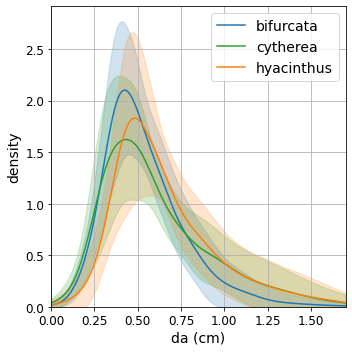

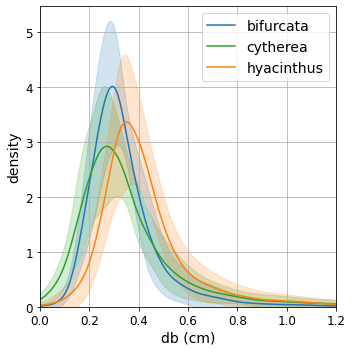

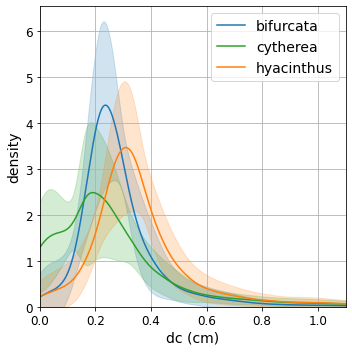

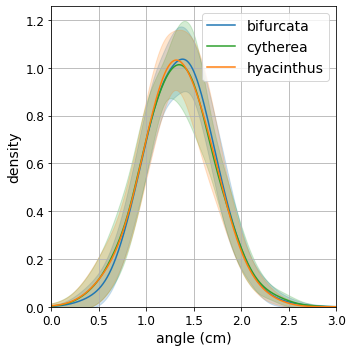

In [43]:
for sphere in spheres:
    data = load_data.readPickle(f'KD_estimation/KDE_{sphere}_bw{bw}')
    data2 = load_data.readPickle(f'KD_estimation/KDE_{sphere}')
    lines = data['lines']
    lines2 = data2['lines']
    rang = data['range']
    fig = plotKDE(lines2, rang, species_info,xlabel = f'{sphere} (cm)')
    plt.savefig(f'{vtk.DIR_FIG}/KDE/KDE_{sphere}.pdf', dpi = DPI)
